In [5]:
import os
import time

In [4]:
# Cutadapt adapter sequence: AGATCGGAAGAGC

In [17]:
def get_file_names():
    raw_files = []
    os.chdir("/teams/DSC180A_FA20_A00/b04genetics/group_1/raw_data")
    raw_files = os.listdir()
    os.chdir("/datasets/home/40/840/r1cummin/alzheimers_gene_analysis")
    return raw_files

In [18]:
get_file_names()

['SRR837496.fastq.gz',
 'SRR837499.fastq.gz',
 'SRR837470.fastq.gz',
 'SRR837438.fastq.gz',
 'SRR837437.fastq.gz',
 'SRR837504.fastq.gz',
 'SRR837489.fastq.gz',
 'SRR837486.fastq.gz',
 'SRR837460.fastq.gz',
 'SRR837450.fastq.gz',
 'SRR837440.fastq.gz',
 'SRR837503.fastq.gz',
 'SRR837481.fastq.gz',
 'SRR837467.fastq.gz',
 'SRR837468.fastq.gz',
 'SRR837491.fastq.gz',
 'SRR837478.fastq.gz',
 'SRR837477.fastq.gz',
 'SRR837448.fastq.gz',
 'SRR837447.fastq.gz',
 'SRR837457.fastq.gz',
 'SRR837458.fastq.gz',
 'SRR837451.fastq.gz',
 'SRR837441.fastq.gz',
 'SRR837471.fastq.gz',
 'SRR837498.fastq.gz',
 'SRR837497.fastq.gz',
 'SRR837505.fastq.gz',
 'SRR837439.fastq.gz',
 'SRR837461.fastq.gz',
 'SRR837487.fastq.gz',
 'SRR837488.fastq.gz',
 'SRR837446.fastq.gz',
 'SRR837449.fastq.gz',
 'SRR837459.fastq.gz',
 'SRR837456.fastq.gz',
 'SRR837502.fastq.gz',
 'SRR837469.fastq.gz',
 'SRR837466.fastq.gz',
 'SRR837480.fastq.gz',
 'SRR837476.fastq.gz',
 'SRR837479.fastq.gz',
 'SRR837490.fastq.gz',
 'SRR837465

# FASTQC

In [7]:
def fastqc(raw_files):
    pass_data = [] #creating array that will hold name of passing data
    fail_data = [] #creating array that will hold name of not passing data
    for i in raw_files:
        print(i)
        os.chdir('..')
        os.chdir('/datasets/home/40/840/r1cummin/alzheimers_gene_analysis')
        print("making dir")
        os.system('mkdir fastq_out')
        print("running fastqc...")
        os.system('/opt/FastQC/fastqc /teams/DSC180A_FA20_A00/b04genetics/group_1/raw_data/'+i+' --extract --outdir=fastq_out/')
        print("Fastqc finished")
      
        print("Opening file")
        with open('fastq_out/'+i[0:-3].replace('.','_')+'c/fastqc_data.txt') as f:
            first_line = f.readlines()[1]
        print("Seeing if pass in file... then adding to array")
        if 'pass' in first_line:
            pass_data.append(i)
        else:
            fail_data.append(i)
        print("Now deleting dir in order so that we can do the next iteration:")
        os.system('rm -rf fastq_out')
    return pass_data, fail_data

In [19]:
raw_files = get_file_names()
pass_data, fail_data = fastqc(raw_files)

# CUTADAPT

In [17]:
#testing
print("making temp dir")
os.system('mkdir cutadapt_tmp')
print("running cutadapt")
os.system('cutadapt -a AGATCGGAAGAGC -o cutadapt_tmp/SRR837460.fastq.gz /teams/DSC180A_FA20_A00/b04genetics/group_1/raw_data/SRR837460.fastq.gz --cores=32')

making temp dir
running cutadapt


0

In [17]:
def cutadapt(pass_data):
#     initial = 0
    cut_fastq_files = []
    print("making temp dir")
    os.system('mkdir cutadapt_tmp')
    for i in (pass_data):
        print(i)
        print("Starting cutadapt:")
        os.system('cutadapt -a AGATCGGAAGAGC -o cutadapt_tmp/'+i+' /teams/DSC180A_FA20_A00/b04genetics/group_1/raw_data/'+i+' --cores=32')
        cut_fastq_files.append(i)
        print("cutadapt finished on this file, starting on next file:")
#         initial = initial + 1
    print("cutadapt finished in its entirety")
    return cut_fastq_files

In [ ]:
cut_fastq_files = cutadapt(pass_data)

making temp dir
Starting cutadapt:
cutadapt finished on this file, starting on next file:
Starting cutadapt:


In [18]:
# got broken pipe so continuing where we left off:
data_interupted = get_file_names()
data_interupted = data_interupted[16:]
cut_fastq_files = cutadapt(data_interupted)

making temp dir
SRR837478.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837477.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837448.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837447.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837457.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837458.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837451.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837441.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837471.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837498.fastq.gz
Starting cutadapt:
cutadapt finished on this file, starting on next file:
SRR837497.fastq.gz
Starting cutadapt:
cutadapt finishe

# 2nd FASTQC

In [6]:
# os.chdir("alzheimers_gene_analysis")
os.listdir()
#os.chdir("..")

['test',
 'src',
 'run.py',
 'data',
 'config',
 'README.md',
 '.gitignore',
 'cutadapt_tmp',
 'references',
 '.ipynb_checkpoints',
 'cut_fastq_out',
 'notebooks',
 '.git']

In [ ]:
def second_fastqc():
    # reRunning the cutadapt files through fastqc

    pass_cut_data = [] #creating array that will hold name of passing data
    fail_cut_data = [] #creating array that will hold name of not passing data

    print('Getting name of cutadapt files')
    os.chdir('cutadapt_tmp')
    cut_fastq_files = os.listdir() #all the trimmed fastq files
    os.chdir('..')
    cut_fastq_files = [i for i in cut_fastq_files if '.fastq' in i]
    cut_fastq_files.sort()

    os.system('mkdir cut_fastq_out')
    counter = 1
    for i in cut_fastq_files:
        print(i)
        print(counter)
        counter += 1
#         os.chdir('..')
#         print("making dir...")
#         os.system('mkdir cut_fastq_out')
        print("running fastqc...")
        try:
            os.system('/opt/FastQC/fastqc cutadapt_tmp/'+i+' --extract --outdir=cut_fastq_out/')
        except:
            print("The file "+i+" encountered an error (Most likely too truncated)\nMoving to next file")
            fail_cut_data.append(i)
            continue
            
        print("Fastqc finished")
        
        print("Opening file")
#         print(' the file path before opeining: cut_fastq_out/'+i[0:-3][::-1].replace('.','_',1)[::-1]+'c/fastqc_data.txt')
        try:
            print(' the file path before opeining: cut_fastq_out/'+i[0:-3][::-1].replace('.','_',1)[::-1]+'c/fastqc_data.txt')
            with open('cut_fastq_out/'+i[0:-3][::-1].replace('.','_',1)[::-1]+'c/fastqc_data.txt') as f:
                cut_first_line = f.readlines()[1]
            print("Seeing if pass in file... then adding to array")
            if 'pass' in cut_first_line:
                pass_cut_data.append(i)
            else:
                fail_cut_data.append(i)
        except:
            print("The file "+i+" encountered an error (Most likely too truncated)\nMoving to next file")
            fail_cut_data.append(i)
            continue
        #print("Now deleting dir in order so that we can do the next iteration:")
#         os.chdir('..')
#         os.chdir('/datasets/home/40/840/r1cummin/DSC180A-Checkpoint-02')
        #os.system('rm -rf cut_fastq_out')
    # NEED TO MOVE THE DATA TO DATA/OUT FOR FINAL SUBMISSION FORMAT
    return pass_cut_data, fail_cut_data

In [ ]:
pass_cut_data, fail_cut_data = second_fastqc()
#467 not passing

In [20]:
raw_data = get_file_names()
raw_data.sort()

In [21]:
# based on above outputs we know that SRR837467 is not passing...
# since the above kernel was interrupted we will be "hand-making" the pass_cut_data and fail_cut_data
# this would not need to be done unless the cell was interrupted, and our cell was interupted HENCE why we are doing it:
pass_cut_data = [i for i in raw_data if i != 'SRR837467.fastq.gz']
fail_cut_data = ['SRR837467.fastq.gz']
len(pass_cut_data)

69

# Kallisto

In [16]:
os.listdir()

['test',
 'src',
 'run.py',
 'data',
 'config',
 'README.md',
 '.gitignore',
 'cutadapt_tmp',
 'references',
 '.ipynb_checkpoints',
 'cut_fastq_out',
 'kallisto_tmp',
 'notebooks',
 '.git']

In [22]:
def kallisto(pass_cut_data):
    
    print("Making dir for Kallisto Output:")
    #os.system("mkdir kallisto_tmp")
    for i in pass_cut_data:
        #SRR837468
        #modifications:
        if i == 'SRR837468.fastq.gz':
            
            print("Running Kallisto:")
            print(i)
            command = f"/opt/kallisto_linux-v0.42.4/kallisto quant -i data/reference.idx -o kallisto_tmp/kallisto_output_"+i[0:9]+" --single -l 50 -s 10 -b 8 -t 8 cutadapt_tmp/"+i
            os.system(command)
            #os.system("/opt/kallisto_linux-v0.42.4/kallisto quant -i /datasets/srp073813/reference/kallisto_transcripts.idx -o kallisto_tmp/kallisto_output_"+pass_cut_data[i][0:10]+" -b 0 "+pass_cut_data[initial]+" "+pass_cut_data[initial+1]+" -t 10")
        else:
            print(i)
            continue
    print("Kallisto successfully ran")
    print("Still need to combine all the CSVs though!")
#     print("Moving the data to data/out/")
#     os.system("mkdir out")
#     os.system("mv out data")
#     os.system("mv kallisto_tmp data/out")
    #do this to the cutadapt and fastqc outputs as well
    return

In [23]:
kallisto(pass_cut_data)

Making dir for Kallisto Output:
SRR837437.fastq.gz
SRR837438.fastq.gz
SRR837439.fastq.gz
SRR837440.fastq.gz
SRR837441.fastq.gz
SRR837442.fastq.gz
SRR837443.fastq.gz
SRR837444.fastq.gz
SRR837445.fastq.gz
SRR837446.fastq.gz
SRR837447.fastq.gz
SRR837448.fastq.gz
SRR837449.fastq.gz
SRR837450.fastq.gz
SRR837451.fastq.gz
SRR837452.fastq.gz
SRR837453.fastq.gz
SRR837454.fastq.gz
SRR837455.fastq.gz
SRR837456.fastq.gz
SRR837457.fastq.gz
SRR837458.fastq.gz
SRR837459.fastq.gz
SRR837460.fastq.gz
SRR837461.fastq.gz
SRR837462.fastq.gz
SRR837463.fastq.gz
SRR837464.fastq.gz
SRR837465.fastq.gz
SRR837466.fastq.gz
Running Kallisto:
SRR837468.fastq.gz
SRR837469.fastq.gz
SRR837470.fastq.gz
SRR837471.fastq.gz
SRR837472.fastq.gz
SRR837473.fastq.gz
SRR837474.fastq.gz
SRR837475.fastq.gz
SRR837476.fastq.gz
SRR837477.fastq.gz
SRR837478.fastq.gz
SRR837479.fastq.gz
SRR837480.fastq.gz
SRR837481.fastq.gz
SRR837482.fastq.gz
SRR837483.fastq.gz
SRR837484.fastq.gz
SRR837485.fastq.gz
SRR837486.fastq.gz
SRR837487.fastq.gz


In [24]:
import pandas as pd

In [44]:
df = pd.DataFrame()
os.chdir("kallisto_tmp")
pass_cut_data = os.listdir()
pass_cut_data = [i for i in pass_cut_data if 'kallisto_output_' in i]
pass_cut_data.sort()
print("hello")
for i in pass_cut_data:
    
    print("Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)")
    print(i)
    tmp_df = pd.read_csv(i+"/abundance.tsv",sep="\t")[['target_id','est_counts']]
    tmp_df[i[-9:]] = tmp_df['est_counts']
    tmp_df = tmp_df.drop(['est_counts'],axis=1)
    if 'target_id' in df.columns:
        df = pd.concat([df,tmp_df[i[-9:]]],axis=1)
    else:
        df = pd.concat([df,tmp_df],axis=1)
    
    print("Added to the dataframe")
    print("Continuing to next iteration:\n")
    #print(os.listdir())
df.to_csv('kallisto_counts.csv')

hello
Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837437
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837438
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837439
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837440
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837441
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR83744

Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837490
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837492
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837493
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837494
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)
kallisto_output_SRR837495
Added to the dataframe
Continuing to next iteration:

Kallisto ran now adding to the dataframe, with only the counts (Also re

In [43]:
os.chdir("..")

os.listdir()

['test',
 'src',
 'run.py',
 'data',
 'config',
 'README.md',
 '.gitignore',
 'cutadapt_tmp',
 'references',
 '.ipynb_checkpoints',
 'cut_fastq_out',
 'kallisto_tmp',
 'notebooks',
 '.git']

In [4]:
strng = 'kallisto_output_SRR837437'
strng[-9:]

'SRR837437'

In [45]:
pd.read_csv('kallisto_counts.csv')

,Unnamed: 0,target_id,SRR837437,SRR837438,SRR837439,SRR837440,SRR837441,SRR837442,SRR837443,SRR837444,...,SRR837497,SRR837498,SRR837499,SRR837500,SRR837501,SRR837502,SRR837503,SRR837504,SRR837505,SRR837506
0,0,ENST00000618624.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,1,ENST00000614042.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,2,ENST00000620756.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,3,ENST00000610860.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,4,ENST00000622103.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58308,58308,ENST00000363781.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
58309,58309,ENST00000484759.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
58310,58310,ENST00000492744.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.01324,...,0.0,0.0,2.09568,0.0,0.0,0.0,2.08821,0.0,0.0,0.0
58311,58311,ENST00000384294.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


# IN ETL FILE:

In [2]:
def get_file_names():
    raw_files = []
    os.chdir("/teams/DSC180A_FA20_A00/b04genetics/group_1/raw_data")
    raw_files = os.listdir()
    os.chdir("/datasets/home/40/840/r1cummin/alzheimers_gene_analysis")
    return raw_files

# IN PIPELINE FILE:

In [1]:
import os
import pandas as pd

#fastqc
def fastqc(raw_files):
    pass_data = [] #creating array that will hold name of passing data
    fail_data = [] #creating array that will hold name of not passing data
    for i in raw_files:
#         os.chdir('..')
#         os.chdir("alzheimers_gene_analysis/")
        #os.chdir('/datasets/home/40/840/r1cummin/alzheimers_gene_analysis')
        print("making dir")
        os.system('mkdir fastq_out')
        print("running fastqc...")
        os.system('/opt/FastQC/fastqc /teams/DSC180A_FA20_A00/b04genetics/group_1/raw_data/'+i+' --extract --outdir=fastq_out/')
        print("Fastqc finished")
      
        print("Opening file")
        with open('fastq_out/'+i[0:-3].replace('.','_')+'c/fastqc_data.txt') as f:
            first_line = f.readlines()[1]
        print("Seeing if pass in file... then adding to array")
        if 'pass' in first_line:
            pass_data.append(i)
        else:
            fail_data.append(i)
        print("Now deleting dir in order so that we can do the next iteration:")
        os.system('rm -rf fastq_out')
    return pass_data, fail_data

#cutadapt
def cutadapt(pass_data):
    cut_fastq_files = []
    print("making temp dir")
    os.system('mkdir cutadapt_tmp')
    for i in (pass_data):
        print(i)
        print("Starting cutadapt:")
        os.system('cutadapt -a AGATCGGAAGAGC -o cutadapt_tmp/'+i+' /teams/DSC180A_FA20_A00/b04genetics/group_1/raw_data/'+i+' --cores=32')
        cut_fastq_files.append(i)
        print("cutadapt finished on this file, starting on next file:")
    print("cutadapt finished in its entirety")
    os.system("mkdir out")
    os.system("mv out data")
    os.system("mv cutadapt_tmp data/out")
    return cut_fastq_files

#second_fastqc
def second_fastqc():
    # reRunning the cutadapt files through fastqc

    pass_cut_data = [] #creating array that will hold name of passing data
    fail_cut_data = [] #creating array that will hold name of not passing data

    print('Getting name of cutadapt files')
    os.chdir('data/out/cutadapt_tmp')
    cut_fastq_files = os.listdir() #all the trimmed fastq files
    os.chdir("..")
    os.chdir("..")
    os.chdir("..")
    cut_fastq_files = [i for i in cut_fastq_files if '.fastq' in i]
    cut_fastq_files.sort()

    os.system('mkdir cut_fastq_out')
#     counter = 1
    for i in cut_fastq_files:
#         print(i)
#         print(counter)
#         counter += 1
#         os.chdir('..')
#         print("making dir...")
#         os.system('mkdir cut_fastq_out')
        print("running fastqc...")
        try:
            os.system('/opt/FastQC/fastqc cutadapt_tmp/'+i+' --extract --outdir=cut_fastq_out/')
        except:
            print("The file "+i+" encountered an error (Most likely too truncated)\nMoving to next file")
            fail_cut_data.append(i)
            continue
            
        print("Fastqc finished")
        
        print("Opening file")
#         print(' the file path before opeining: cut_fastq_out/'+i[0:-3][::-1].replace('.','_',1)[::-1]+'c/fastqc_data.txt')
        try:
            print(' the file path before opeining: cut_fastq_out/'+i[0:-3][::-1].replace('.','_',1)[::-1]+'c/fastqc_data.txt')
            with open('cut_fastq_out/'+i[0:-3][::-1].replace('.','_',1)[::-1]+'c/fastqc_data.txt') as f:
                cut_first_line = f.readlines()[1]
            print("Seeing if pass in file... then adding to array")
            if 'pass' in cut_first_line:
                pass_cut_data.append(i)
            else:
                fail_cut_data.append(i)
        except:
            print("The file "+i+" encountered an error (Most likely too truncated)\nMoving to next file")
            fail_cut_data.append(i)
            continue
        #print("Now deleting dir in order so that we can do the next iteration:")
        os.system('rm -rf cut_fastq_out')
    # NEED TO MOVE THE DATA TO DATA/OUT FOR FINAL SUBMISSION FORMAT
    return pass_cut_data, fail_cut_data


#kallisto
def kallisto(pass_cut_data):
    
    print("Making dir for Kallisto Output:")
    os.system("mkdir kallisto_tmp")
    for i in pass_cut_data:
        print("Running Kallisto:")
        #print(i)
        command = f"/opt/kallisto_linux-v0.42.4/kallisto quant -i data/reference.idx -o kallisto_tmp/kallisto_output_"+i[0:9]+" --single -l 50 -s 10 -b 8 -t 8 cutadapt_tmp/"+i
        os.system(command)
    print("Kallisto successfully ran")
    print("Still need to combine all the CSVs though!")
    print("Moving the Kallisto_tmp data to data/out/")
    os.system("mkdir out")
    os.system("mv out data")
    os.system("mv kallisto_tmp data/out")
    
    #combining the counts:
    df = pd.DataFrame()
    os.chdir("data/out/kallisto_tmp")
    kallisto_count_files = os.listdir()
    kallisto_count_files = [i for i in kallisto_count_files if 'kallisto_output_' in i]
    kallisto_count_files.sort()
    for i in kallisto_count_files:

        print("Kallisto ran now adding to the dataframe, with only the counts (Also renaming the column name)")
        #print(i)
        tmp_df = pd.read_csv(i+"/abundance.tsv",sep="\t")[['target_id','est_counts']]
        tmp_df[i[-9:]] = tmp_df['est_counts']
        tmp_df = tmp_df.drop(['est_counts'],axis=1)
        if 'target_id' in df.columns:
            df = pd.concat([df,tmp_df[i[-9:]]],axis=1)
        else:
            df = pd.concat([df,tmp_df],axis=1)

        print("Added to the dataframe")
        print("Continuing to next iteration:\n")
    df.to_csv('kallisto_counts.csv')
    os.system("mv kallisto_counts.csv data/out")
    return

# EDA 

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
patients = pd.read_csv("../references/SraRunTable.txt")

In [154]:
patients.head(10)

,Run,Age,Bases,Bytes,Experiment,gender,GROUP,LibrarySelection,Sample Name,SRA Study
0,SRR837437,77,891533900,521467001,SRX273417,female,alzheimer patient,size fractionation,GSM1132688,SRP022043
1,SRR837438,74,869717450,495593756,SRX273418,male,alzheimer patient,size fractionation,GSM1132689,SRP022043
2,SRR837439,68,758073050,441476174,SRX273419,male,alzheimer patient,size fractionation,GSM1132690,SRP022043
3,SRR837440,75,835484250,484958529,SRX273420,female,alzheimer patient,size fractionation,GSM1132691,SRP022043
4,SRR837441,74,853289150,506219095,SRX273421,male,alzheimer patient,size fractionation,GSM1132692,SRP022043
5,SRR837442,76,808726750,471300396,SRX273422,male,alzheimer patient,size fractionation,GSM1132693,SRP022043
6,SRR837443,79,1046527600,594268839,SRX273423,male,alzheimer patient,size fractionation,GSM1132694,SRP022043
7,SRR837444,75,664306350,387247692,SRX273424,female,alzheimer patient,size fractionation,GSM1132695,SRP022043
8,SRR837445,77,885352750,514100236,SRX273425,male,alzheimer patient,size fractionation,GSM1132696,SRP022043
9,SRR837446,72,669992300,373134438,SRX273426,female,alzheimer patient,size fractionation,GSM1132697,SRP022043


In [12]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 27 columns):
Run                    70 non-null object
Age                    70 non-null int64
Assay Type             70 non-null object
AvgSpotLen             70 non-null int64
Bases                  70 non-null int64
BioProject             70 non-null object
BioSample              70 non-null object
Bytes                  70 non-null int64
Center Name            70 non-null object
Consent                70 non-null object
DATASTORE filetype     70 non-null object
DATASTORE provider     70 non-null object
DATASTORE region       70 non-null object
Experiment             70 non-null object
gender                 70 non-null object
GEO_Accession (exp)    70 non-null object
GROUP                  70 non-null object
Instrument             70 non-null object
LibraryLayout          70 non-null object
LibrarySelection       70 non-null object
LibrarySource          70 non-null object
Organism           

In [22]:
# Drop columns that have all the same value:
patients = patients.drop(['AvgSpotLen','Assay Type','BioProject','BioSample','Center Name','Consent','DATASTORE filetype',
              'DATASTORE provider','DATASTORE region','GEO_Accession (exp)','Instrument','LibraryLayout',
               'LibrarySource','LibraryLayout','Organism','Platform','ReleaseDate','source_name'],axis=1)
patients

,Run,Age,Bases,Bytes,Experiment,gender,GROUP,LibrarySelection,Sample Name,SRA Study
0,SRR837437,77,891533900,521467001,SRX273417,female,alzheimer patient,size fractionation,GSM1132688,SRP022043
1,SRR837438,74,869717450,495593756,SRX273418,male,alzheimer patient,size fractionation,GSM1132689,SRP022043
2,SRR837439,68,758073050,441476174,SRX273419,male,alzheimer patient,size fractionation,GSM1132690,SRP022043
3,SRR837440,75,835484250,484958529,SRX273420,female,alzheimer patient,size fractionation,GSM1132691,SRP022043
4,SRR837441,74,853289150,506219095,SRX273421,male,alzheimer patient,size fractionation,GSM1132692,SRP022043
5,SRR837442,76,808726750,471300396,SRX273422,male,alzheimer patient,size fractionation,GSM1132693,SRP022043
6,SRR837443,79,1046527600,594268839,SRX273423,male,alzheimer patient,size fractionation,GSM1132694,SRP022043
7,SRR837444,75,664306350,387247692,SRX273424,female,alzheimer patient,size fractionation,GSM1132695,SRP022043
8,SRR837445,77,885352750,514100236,SRX273425,male,alzheimer patient,size fractionation,GSM1132696,SRP022043
9,SRR837446,72,669992300,373134438,SRX273426,female,alzheimer patient,size fractionation,GSM1132697,SRP022043


#### Categorical Features

In [23]:
cat_features = ['Experiment', 'gender', 'GROUP', 'SRA Study']
for colname in cat_features:
    patients[colname] = patients[colname].astype('category')

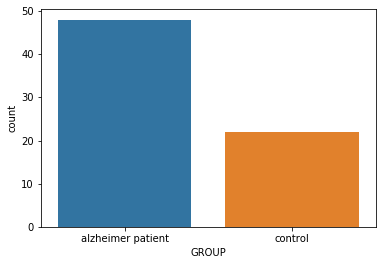

In [24]:
sns.countplot(x='GROUP', data=patients)

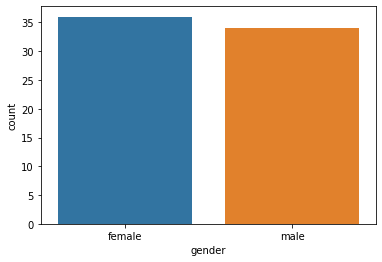

In [25]:
sns.countplot(x='gender', data=patients)

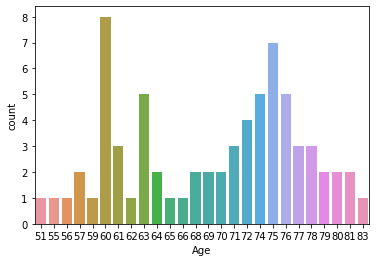

In [26]:
sns.countplot(x='Age', data=patients)

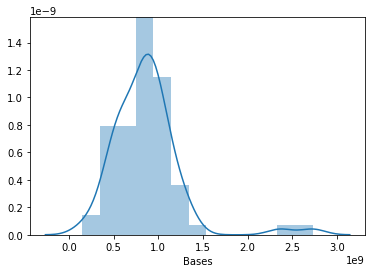

In [27]:
sns.distplot(patients['Bases'])

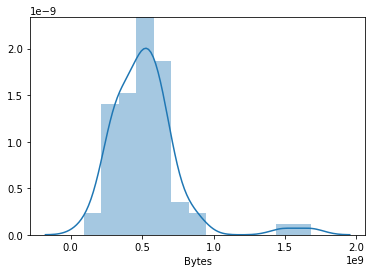

In [28]:
sns.distplot(patients['Bytes'])

In [35]:
patients.groupby('gender').mean()

,Age,Bases,Bytes
gender,,,
female,66.916667,8.302909e+08,5.038989e+08
male,71.852941,8.974714e+08,5.349193e+08


In [36]:
patients.groupby('GROUP').mean()

,Age,Bases,Bytes
GROUP,,,
alzheimer patient,70.333333,8.969719e+08,5.491423e+08
control,67.090909,7.886296e+08,4.531266e+08


Text(0, 0.5, '# of Patients')

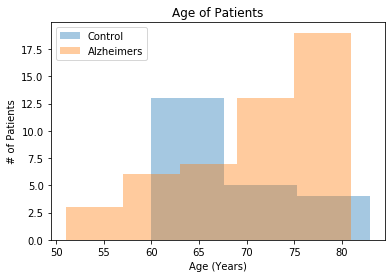

In [4]:
df = patients[patients['GROUP'] == 'control']
sns.distplot(df['Age'],  kde=False, label='Control')

df = patients[patients['GROUP'] == 'alzheimer patient']
sns.distplot(df['Age'],  kde=False, label='Alzheimers')

plt.legend(prop={'size': 10})
plt.title('Age of Patients')
plt.xlabel('Age (Years)')
plt.ylabel('# of Patients')

Text(0, 0.5, 'Count')

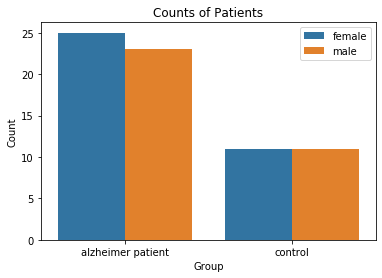

In [5]:
gender = patients.groupby(['gender', 'GROUP'])['GROUP'].agg(['count'])
gender = gender.reset_index()

ax = sns.barplot(x="GROUP", y="count", hue="gender", data=gender)
plt.legend(prop={'size': 10})
plt.title('Counts of Patients')
plt.xlabel('Group')
plt.ylabel('Count')

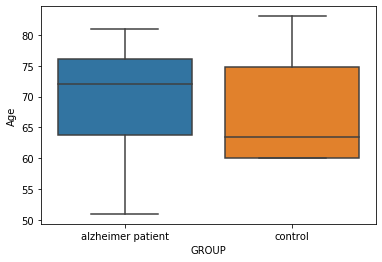

In [161]:
sns.boxplot(x=patients['GROUP'], y=patients['Age'])

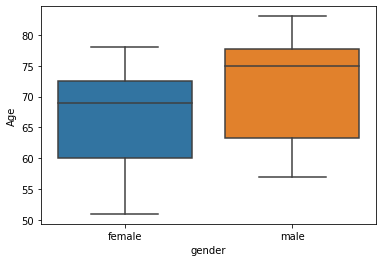

In [162]:
sns.boxplot(x=patients['gender'], y=patients['Age'])

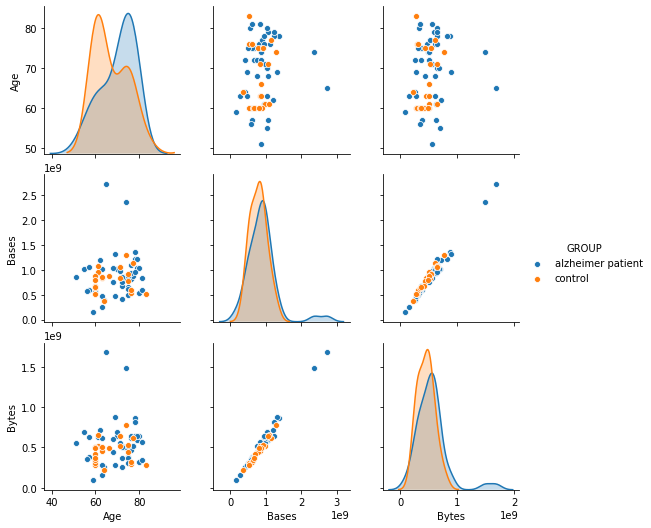

In [169]:
sns.pairplot(patients[['Age','Bases','Bytes']+['GROUP']], hue = 'GROUP')

##### EDA on our miRNA counts for each sample:

In [103]:
filtered_counts = pd.read_csv("../../filtered_counts.csv",index_col =0)
filtered_counts.head()

,SRR837437,SRR837438,SRR837439,SRR837440,SRR837441,SRR837442,SRR837443,SRR837444,SRR837445,SRR837446,...,SRR837497,SRR837498,SRR837499,SRR837500,SRR837501,SRR837502,SRR837503,SRR837504,SRR837505,SRR837506
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000619109.1,0.166667,0.363636,0.272727,0.181818,0.363636,0.083333,0.076923,1.22222,1.1,2.09888,...,0.2,0.166667,1.09091,1.33333,0.181818,0.666667,0.272727,0.363636,0.2,0.0
ENST00000614083.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,...,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ENST00000614774.1,0.166667,0.363636,0.272727,0.000000,0.363636,0.000000,0.076923,0.00000,0.0,0.00000,...,0.0,0.166667,0.00000,0.00000,0.000000,0.666667,0.000000,0.000000,0.0,0.0
ENST00000516659.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,...,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ENST00000362512.1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.00000,0.0,5.00000,...,0.0,0.000000,2.00000,0.00000,1.000000,0.000000,1.000000,0.000000,0.0,0.0


In [104]:
filtered_counts.var(axis=1).median()

0.015151515151515138

In [105]:
filtered_counts.var(axis=1).mean()

312346.673566017

In [106]:
max(filtered_counts.var(axis=1)), min(filtered_counts.var(axis=1))

(566545593.415102, 3.2753828546969694e-18)

In [107]:
filtered_counts.var(axis=1).head(10)

target_id
ENST00000619109.1       1.659741
ENST00000614083.1       0.004021
ENST00000614774.1       0.951990
ENST00000516659.1       0.003788
ENST00000362512.1    4877.944696
ENST00000384630.1       0.007459
ENST00000606623.1       0.002814
ENST00000410533.1       0.004021
ENST00000384534.1       0.002814
ENST00000364784.1       0.002814
dtype: float64

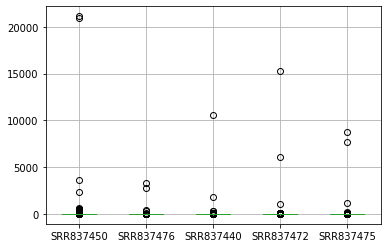

In [114]:
filtered_counts.sample(5,axis=1).boxplot()

In [130]:
fc_var_imputed = [-0.0000001 if i > 200 else i for i in filtered_counts.var(axis=1).values]

[0, 25, 0, 0.01]

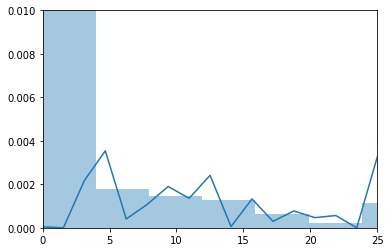

In [134]:
sns.distplot(fc_var_imputed)
plt.axis([0, 25, 0, 0.01])

In [148]:
sum(np.array(fc_var_imputed) == -0.0000001)

80

In [149]:
sum(np.array(fc_var_imputed) != -0.0000001)

2302

In [ ]:
#mean

In [152]:
filtered_counts.mean(axis=1).head(10)

target_id
ENST00000619109.1     0.712201
ENST00000614083.1     0.007806
ENST00000614774.1     0.224362
ENST00000516659.1     0.007576
ENST00000362512.1    15.697500
ENST00000384630.1     0.015152
ENST00000606623.1     0.008586
ENST00000410533.1     0.007806
ENST00000384534.1     0.008586
ENST00000364784.1     0.008586
dtype: float64

In [153]:
max(filtered_counts.mean(axis=1)), min(filtered_counts.mean(axis=1))

(15641.153287878782, 2.227712121212121e-10)